In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import math


In [2]:
def find_similar(points):
    similar = []
    for j,point_j in enumerate(points.T):
        similar_j = []
        for i,point_i in enumerate(points.T):
            if (math.isclose(point_i[3], point_j[3],rel_tol = 1e-3)):
                if i != j:
                    similar_j.append(i)
        similar.append(similar_j)
    return similar
                    

In [3]:
def find_most_similar(points):
    # find the 3 mosgt similar points out of the set 
    distance_array = []
    for i in range(0,points.shape[0]):
        for j in range(i+1,points.shape[0]):
            distance_array.append([i,j,np.abs((points[i,3]-points[j,3])/(max(points[i,3],points[j,3])))])
    return  distance_array , np.argsort(np.asarray(distance_array)[:,2])


In [4]:
def find_one_similar(points):
    for j,point_j in enumerate(points.T):
        similar = []
        for i,point_i in enumerate(points.T):
            if (math.isclose(point_i[3], point_j[3],rel_tol = 1e-3)):
                if i != j:
                    similar.append(i)
        if len(similar) >= 3:
            return similar
    print("no large enough set of similar points found")
    return []
            


In [5]:

def rotation_matrix_arbitrary_axis(axis, angle):
    """
    Returns a 3D rotation matrix for rotating around an arbitrary axis by a given angle (in radians).
    
    :param axis: A 3D unit vector representing the axis of rotation (array-like or list).
    :param angle: The angle in radians by which to rotate.
    :return: A 3x3 rotation matrix.
    """
    axis = np.array(axis)
    axis = axis / np.linalg.norm(axis)  # Ensure the axis is a unit vector
    
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    one_minus_cos = 1 - cos_theta
    
    # Skew-symmetric matrix of the axis
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Outer product of the axis
    outer_product = np.outer(axis, axis)
    
    # Rotation matrix using Rodrigues' formula
    R = cos_theta * np.eye(3) + one_minus_cos * outer_product + sin_theta * K
    
    return R

def rotate_vector_arbitrary_axis(vector, axis, angle):
    """
    Rotates a 3D vector around an arbitrary axis by a given angle (in radians).
    
    :param vector: A 3D vector to rotate (as a list or numpy array).
    :param axis: A 3D unit vector representing the axis of rotation.
    :param angle: The angle in radians by which to rotate the vector.
    :return: The rotated 3D vector.
    """
    rot_matrix = rotation_matrix_arbitrary_axis(axis, angle)
    rotated_vector = np.dot(rot_matrix, vector)
    return rotated_vector

In [6]:
# dont role dice too often
import random


r_axis = np.asarray([np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1))])
r_angle = random.uniform(0,1.5708)
rot_mat = rotation_matrix_arbitrary_axis(r_axis, r_angle)


In [7]:
print(r_axis, r_angle)

[0.33040947 0.29706958 0.05169386] 0.3833980821671813


In [8]:
# Ball:
# rotate pointset
cm = plt.get_cmap("RdYlGn")


res = 25

# Make data
phis = np.linspace(1e-1, np.pi/2-1e-1, res)
thetas = np.linspace(1e-1, np.pi/2-1e-1, res)

# phis = np.linspace(0, 2*np.pi, res)
# thetas = np.linspace(0 , np.pi, res)

x,y,z,ref = np.empty((0)), np.empty((0)),np.empty((0)), np.empty((0))

for phi in phis:
    for theta in thetas:
        x =  np.append(x,np.cos(phi)*np.sin(theta))
        y =  np.append(y,np.sin(phi)*np.sin(theta))
        z =  np.append(z,np.cos(theta))
        ref = np.append(ref,abs(np.cos(theta)))

# rotate and stack the points
points = np.vstack((np.vstack((x,y)),z))

ref_grid = np.vstack((points,ref))

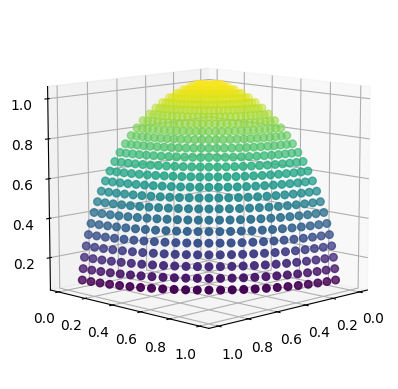

In [9]:

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(ref_grid[0,:], ref_grid[1,:], ref_grid[2,:], s=30, c=ref_grid[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show() 

In [10]:
col = np.empty((0))
for point in points.T:
        col = np.append(col,np.abs((rot_mat@np.array((0,0,1)))@point))
        # np.append(col,np.abs( point[2]))

# now stack
grid = np.vstack((points,col))



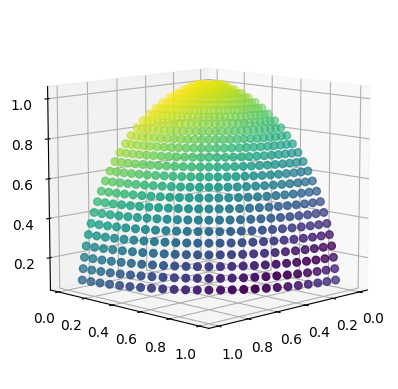

In [11]:
cutoff = points.shape[1]

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o')                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)


plt.show() 

In [12]:
similar_points = find_similar(grid)
print(similar_points)

[[29, 51, 53], [4, 27], [3], [2], [1, 27], [25, 29, 53], [103, 127, 150], [202, 300], [228, 351, 475], [58, 107, 254, 501], [329], [281, 528], [356, 430, 529], [], [186], [310], [139], [386], [264, 461], [], [], [], [], [220], [], [5, 76, 77], [28], [1, 4], [26], [0, 5, 51, 53], [100], [104, 201, 225], [154, 301, 400], [426, 600], [83, 132, 181, 230, 353, 601], [], [380], [258], [580], [211, 482, 581], [483, 582], [410, 583], [165], [], [290], [], [], [], [], [], [], [0, 29, 52], [51], [0, 5, 29], [75, 78, 101, 102], [152, 176], [325], [500], [9, 107, 254, 501], [108, 157, 329, 403], [], [282], [], [], [236, 433], [], [], [], [191], [], [], [], [], [], [], [54, 78, 101], [25, 77], [25, 76], [54, 75, 101, 102], [150, 151], [153, 226, 275], [252, 425], [278], [34, 132, 181, 230, 353, 601], [133, 453, 577], [306, 454], [], [382], [260], [], [], [559], [560], [], [217], [341], [], [], [], [], [30, 102], [54, 75, 78], [54, 78, 100], [6, 127, 150, 151], [31, 201, 225], [227, 276, 350], [302,

In [13]:
longitudinal = []
for i in similar_points[0]:
    longitudinal.append(grid.T[i,:])

longitudinal = np.asarray(longitudinal)

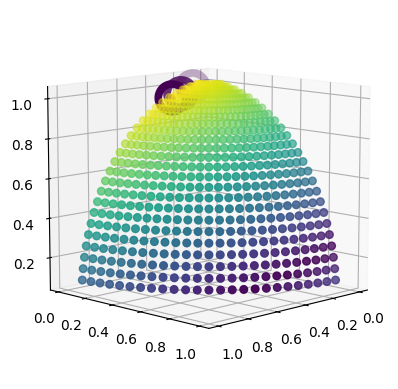

In [14]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o',zorder=-99)                                                                                
p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

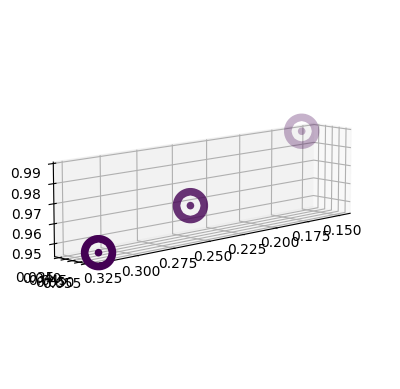

In [15]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

In [16]:
f = open("grid.txt", "a")

with open("grid.txt", "w") as f:
    for point in grid.T:
        print(*point, sep = ' ', file=f)
with open("longitudinal.txt", "w") as f:
    for point in longitudinal:
        print(*point, sep = ' ', file=f)

In [17]:
similar_points = find_one_similar(grid)

In [18]:
longitudinal = []
for i in similar_points:
    longitudinal.append(grid.T[i,:])

longitudinal = np.asarray(longitudinal)

In [19]:
a = longitudinal[0,:-1]
b = longitudinal[1,:-1]
c = longitudinal[2,:-1]

# a = np.array((1,0,1))
# b = np.array((1,1,1))
# c = np.array((1,1,0))

# print(a,b,c)
# print((a-b)/np.linalg.norm(a-b),(b-c)/np.linalg.norm(b-c))

n = np.cross(a-c,b-a)
n = n/np.linalg.norm(n)


print(n@(a-c)/(np.linalg.norm(a-c)))
print(f"normalvector: {n/np.linalg.norm(n)}")
print(f"rotmat@z    : {rot_mat@np.asarray([0,0,1])}")

rot_mat_2 = rotation_matrix_arbitrary_axis(np.cross(n,np.asarray([0,0,1])), -np.arccos(np.dot(n,np.asarray([0,0,1]))/(np.linalg.norm(n))))
points = rot_mat_2@points[:,:]

print(rot_mat@rot_mat_2)

col = np.empty((0))
for point in points.T:
        col = np.append(col,np.abs( point[2]))

grid = np.vstack((points,col))


0.0
normalvector: [-0.25617577  0.2123523  -0.94301669]
rotmat@z    : [ 0.25462484 -0.2707364   0.92836845]
[[-0.0887087   0.86750358 -0.48945714]
 [ 0.83460195  0.33294707  0.43884601]
 [ 0.54366381 -0.36957242 -0.75355549]]


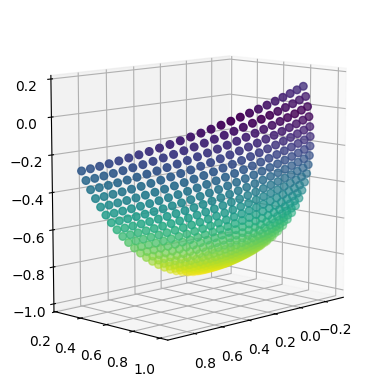

In [20]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o',zorder=-99)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show() 

In [21]:
# for i,similar in enumerate(similar_points):
#     print(i, similar)
dists, indices = find_most_similar(grid.T)
sorted_distances = np.asarray(dists)[indices,:]


In [22]:
indices = np.argsort(grid.T[:,3])
print(indices[0:3])
print(type(indices[0:3]))

print(sorted_distances[0:10,:])
# print(grid.T[indices[0:3],:])
# print(grid.T[np.asarray([17, 18, 19, 20, 21]),:])


[ 72 249 148]
<class 'numpy.ndarray'>
[[7.00000000e+01 7.40000000e+01 6.05552825e-15]
 [7.10000000e+01 7.30000000e+01 1.22172580e-14]
 [4.70000000e+02 6.22000000e+02 1.03896676e-05]
 [5.52000000e+02 5.78000000e+02 1.05314394e-05]
 [1.00000000e+00 3.54000000e+02 1.97512934e-05]
 [4.00000000e+02 4.77000000e+02 2.51157826e-05]
 [5.50000000e+01 4.09000000e+02 2.95257249e-05]
 [2.78000000e+02 4.81000000e+02 2.96038162e-05]
 [3.79000000e+02 5.57000000e+02 3.09710389e-05]
 [3.30000000e+01 2.35000000e+02 3.53790912e-05]]


In [37]:
    def search_closets_thruple(sorted_distances):
        pairs, codons  = [], []
        for pair in sorted_distances:
            current_pair = [int(pair[0]), int(pair[1])]
            if current_pair[0] in pairs:
                # print(pairs.index(int(current_pair[0])))
                return current_pair[0], current_pair[1], codons[pairs.index(int(current_pair[0]))]
            if current_pair[1] in pairs:        
                return current_pair[0], current_pair[1], codons[pairs.index(int(current_pair[1]))]
                # print(pairs.index(int(current_pair[1])))        
            # print(current_pair[0] in [x for xs in pairs for x in xs], current_pair[1] in [x for xs in pairs for x in xs])
            print(current_pair, pairs, current_pair[0] in pairs, current_pair[1] in pairs)
            pairs.append(current_pair[0])
            pairs.append(current_pair[1])
            codons.append(current_pair[1])
            codons.append(current_pair[0])
    


In [38]:

thruple = search_closets_thruple(sorted_distances)
print(sorted_distances.shape)
print(thruple)

[70, 74] [] False False
[71, 73] [70, 74] False False
[470, 622] [70, 74, 71, 73] False False
[552, 578] [70, 74, 71, 73, 470, 622] False False
[1, 354] [70, 74, 71, 73, 470, 622, 552, 578] False False
[400, 477] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354] False False
[55, 409] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354, 400, 477] False False
[278, 481] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354, 400, 477, 55, 409] False False
[379, 557] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354, 400, 477, 55, 409, 278, 481] False False
[33, 235] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354, 400, 477, 55, 409, 278, 481, 379, 557] False False
[136, 516] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354, 400, 477, 55, 409, 278, 481, 379, 557, 33, 235] False False
[376, 478] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354, 400, 477, 55, 409, 278, 481, 379, 557, 33, 235, 136, 516] False False
[0, 201] [70, 74, 71, 73, 470, 622, 552, 578, 1, 354, 400, 477, 55, 409, 278, 481, 379, 557, 33, 235, 136, 516, 376, 478]

In [39]:
longitudinal = []
for i in thruple:
    longitudinal.append(grid.T[i,:])

longitudinal = np.asarray(longitudinal)

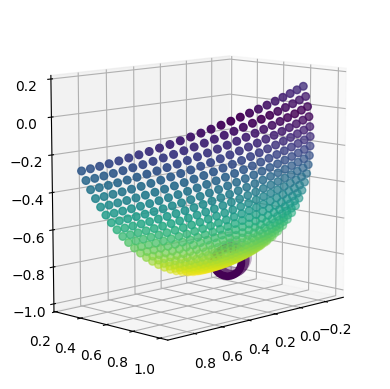

In [40]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(grid[0,:cutoff], grid[1,:cutoff], grid[2,:cutoff], s=30, c=grid[3,:cutoff], marker='o',zorder=-99)                                                                                
p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

In [41]:
a = longitudinal[0,:-1]
b = longitudinal[1,:-1]
c = longitudinal[2,:-1]

# a = np.array((1,0,1))
# b = np.array((1,1,1))
# c = np.array((1,1,0))

# print(a,b,c)
# print((a-b)/np.linalg.norm(a-b),(b-c)/np.linalg.norm(b-c))

n = np.cross(a-c,b-a)
n = n/np.linalg.norm(n)


print(n@(a-c)/(np.linalg.norm(a-c)))
print(f"normalvector: {n/np.linalg.norm(n)}")
print(f"rotmat@z    : {rot_mat@np.asarray([0,0,1])}")

rot_mat_2 = rotation_matrix_arbitrary_axis(np.cross(n,np.asarray([0,0,1])), -np.arccos(np.dot(n,np.asarray([0,0,1]))/(np.linalg.norm(n))))
resulting_points = rot_mat_2@points[:,:]
print(np.dot(n,np.asarray([0,0,1])))
print(np.arccos(np.dot(n,np.asarray([0,0,1]))/(np.linalg.norm(n))))

print(rot_mat@rot_mat_2)

col_2 = np.empty((0))
for resulting_point in resulting_points.T:
        col_2 = np.append(col_2,np.abs( resulting_point[2]))

resulting_grid = np.vstack((resulting_points,col))
resulting_grid = np.vstack((resulting_grid,col_2))


8.42664861916652e-20
normalvector: [ 0.0018841  -0.00192492 -0.99999637]
rotmat@z    : [ 0.25462484 -0.2707364   0.92836845]
-0.9999963724195918
3.1388991122029206
[[ 0.01263354  0.96743938 -0.25278732]
 [ 0.96139726  0.05774349  0.26903716]
 [ 0.27487396 -0.24642793 -0.92936407]]


In [42]:
# for i in range(0,len(col)):
#     print(col[i], col_2[i])


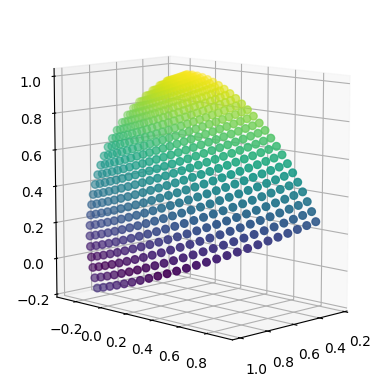

In [43]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(resulting_grid[0,:cutoff], resulting_grid[1,:cutoff], resulting_grid[2,:cutoff], s=30, c=resulting_grid[3,:cutoff], marker='o',zorder=-99)                                                                                
# p3d = ax3D.scatter(longitudinal[:,0], longitudinal[:,1], longitudinal[:,2], s=30, c=longitudinal[:,3]*0, linewidths=20,  marker='o',zorder=2+2.5)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

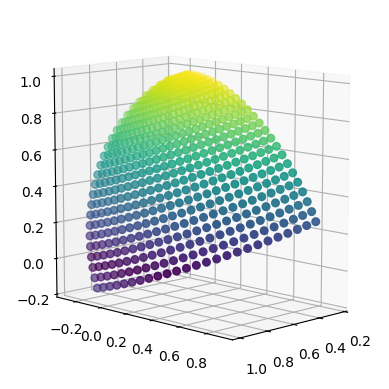

In [44]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(resulting_grid[0,:cutoff], resulting_grid[1,:cutoff], resulting_grid[2,:cutoff], s=30, c=resulting_grid[4,:cutoff], marker='o',zorder=-99)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  